<h2>Imports</h2>

In [1]:
import wrangle as w
import vizzes as v
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('figure', figsize=(10, 7))
plt.style.use('fivethirtyeight')

# Time-Series Project - VP of Marketing

Reported by Craig C. and Jerry N.

<h2>Goals</h2>

- Determine the best way to launch a new marketing campaign in the near future.

- Determine the target of the campaign.

- Back reccomendations of target with statistics and visualizations.

<h2>Executive Summary</h2>

- The central region of the US has the least amount of proft consiting of less than 2% of total proft.

- Within the central region Texas has the least amount of proft and in some cases we are losing profit.

- Looking at Texas, San Antonio and Houston are the largest contributors to the loss of profit. 

- The loss of profit is due to the amount of discount being applied to the products.


### Acquiring and Preparing the Data:

In [3]:
df = w.get_superstore_data()
df.shape

Let me get that for you...


(1734, 23)

Takeaway:
- The data is in a csv file.

Query:
- Joined the following five tables to create the dataframe:
    - Orders
    - Categories
    - Products
    - Customers
    - Regions

Our acquire provides us with a dataframe that is 23 columns and 1,723 rows of data

In [4]:
df = w.prep_superstore_data(df)
df.shape

(1734, 19)

Take Aways:
- Dropped unnecessary columns. (ID columns, Unnecessary columns, and redundant columns)
- Converted the date columns to a manipulatable format(datetime) and set as the index.
- Feature engineered three new columns (average item sale and orginal sale)

This results in dropping 4 columns and keeping all 1,734 rows of data

In [5]:
df.head(2)

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,130.98,261.96,0.0
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,731.94,3.0,0.0,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,243.98,731.94,0.0


### Exploring the data:

During exploration of the data, we were able to answer a few intiail questions...

#### What does profit look like based on region?

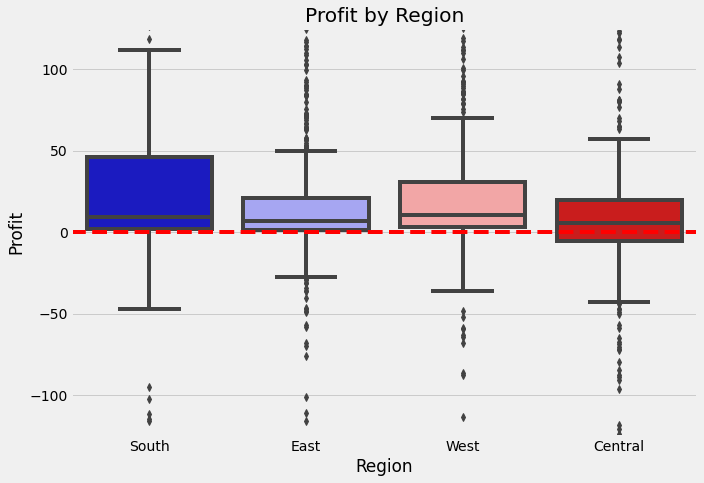

In [6]:
v.profit_by_region(df)

The data in the visual above shows that the central region of the US has the least amount of profit and in some cases we are losing profit.

- H0: Mean of Central region profit = Mean profit of all regions
- Ha: Mean of Central region profit < Mean profit of all regions

In [7]:
v.region_ttest(df)

Alpha: 0.05
P-Value: 0.01444
We reject the Null Hypothesis, therefore mean of central
region is significantly different from overall mean.


#### What does profit look like based on state?

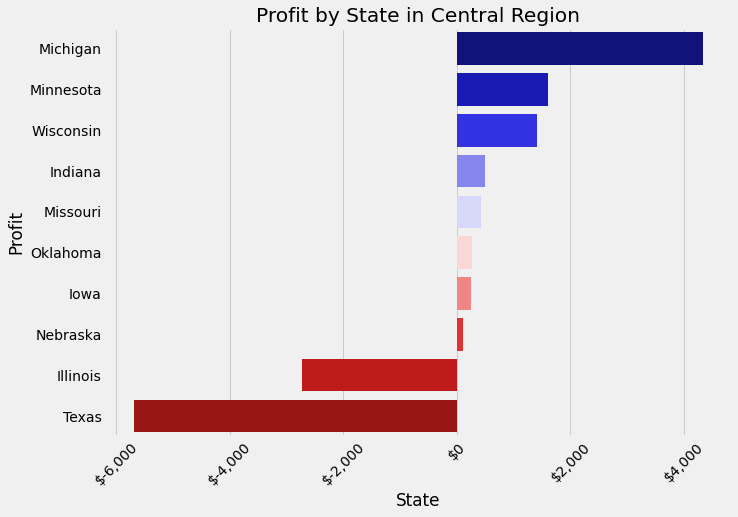

In [8]:
v.profit_by_state(df)

The data in the visual above shows that within the central region Illinois and Texas is losing profit. Texas is the largest contributor to the loss of profit.

In [9]:
v.state_ttest(df)

Alpha: 0.05
P-Value: 0.02118
We reject the Null Hypothesis, therefore mean of 
Texas profit is significantly different from the overall mean proft.


#### What does profit look like for each city in the least profitable state (Texas)?

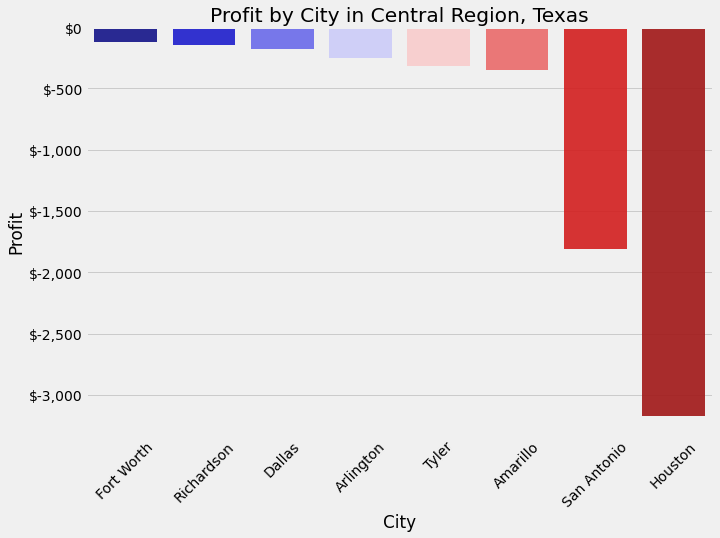

In [10]:
v.neg_profit_tx(df)

The data in the visual above shows that within Texas, San Antonio and Houston are the largest contributors to the loss of profit.

#### What product category can be focused on in order to improve profits?

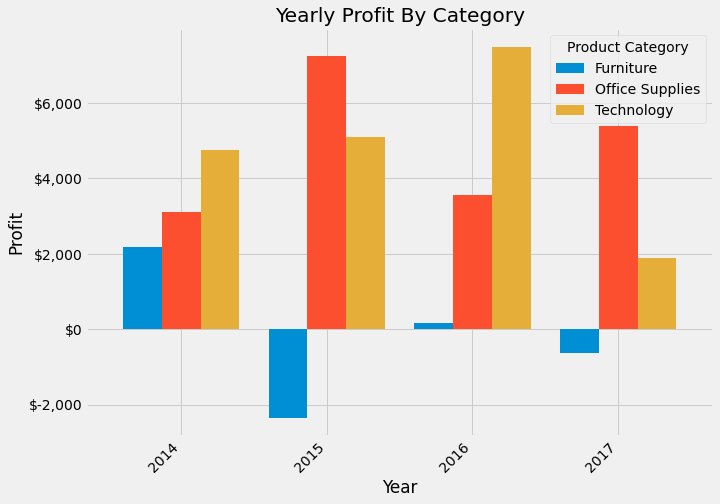

In [11]:
v.yearly_cat_profits(df)

Looking at the data, we can see that the least profitable category is "Furniture". This category is the most likely to be the focus of the marketing campaign.

#### What is causing this negative impact of profit for our furniture product category?

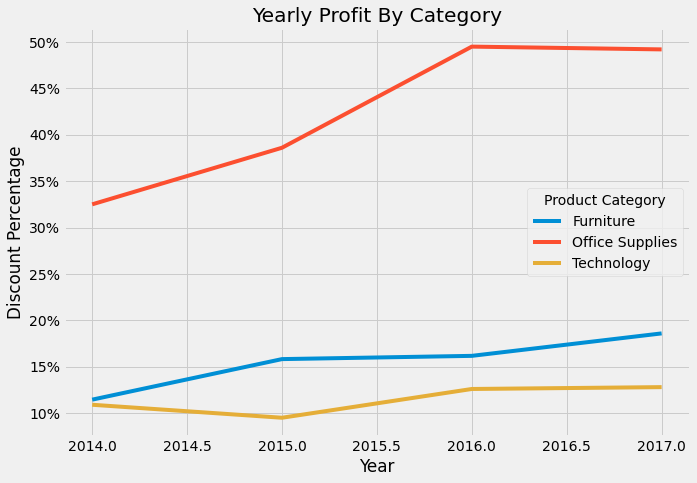

In [12]:
v.yearly_discounts(df)

The data in the visual above shows that the furniture category is linearly correlated with the amount of discount applied to the products. 

In [13]:
v.pearson_corr(df)

Alpha: 0.05
Pearson r: -0.5302115642139265
P-Value: 0.00000
We reject the Null Hypothesis, therefore there is linear
correlation between the furniture profit and the discount.


### Exploritory Summary: 

To begin the exploratory data analysis, we began by going from a macro level to a micro level. Identifying the regions that are the least profitable which was the central region. Looking at the data, we identified all the states that are the least profitable, than identified all the cities that are the least profitable. Once we identified the cities that are the least profitable, we then identified the products that corresponded to the loss of profits. The furniture category was directly correlated with the amount of discount applied to the products.